**Name:** Tarun Kumar Reddy </br>
**School:** Computing and Data Science </br>
**Email Address:** tarun.g-25@scds.saiuniversity.edu.in

## Importing Libraries

In [ ]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

import glob
import PIL
from PIL import Image

2.15.0


## Loading the Data
Loading pre-processed data from the GDrive

In [ ]:
from numpy import load

X_train_std = load('/content/drive/MyDrive/Deep_Learning_Final_Project/X_train_std.npy')
X_test_std = load('/content/drive/MyDrive/Deep_Learning_Final_Project/X_test_std.npy')
y_train = load('/content/drive/MyDrive/Deep_Learning_Final_Project/y_train.npy')
y_test = load('/content/drive/MyDrive/Deep_Learning_Final_Project/y_test.npy')

Loading the DenseNet201 model and taking only the feature extractor

In [ ]:
print("X_train_std_shape: {}".format(X_train_std.shape))
print("X_test_std_shape: {}".format(X_test_std.shape))

X_train_std_shape: (378, 299, 299, 3)
X_test_std_shape: (127, 299, 299, 3)


In [ ]:
model3_TL = keras.applications.ConvNeXtTiny(weights='imagenet',
                                                  include_top=False)

# Visualize the extractor part for transfer learning
tf.keras.utils.plot_model(
    model3_TL,
    to_file='model3_TL.png',
    show_shapes=False,
    show_layer_names=False,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

Freezing the weights of the feature extractor

In [ ]:
# Weights will not be updated during backpropagation
for layer in model3_TL.layers:
  layer.trainabe = False

Adding a Classifier

In [ ]:
# Adding classifier

global_pool = keras.layers.GlobalAveragePooling2D()(model3_TL.output)
x = keras.layers.Dropout(rate = 0.15)(global_pool)
output_ = keras.layers.Dense(units=4, activation='softmax')(x)

model3_TL = keras.models.Model(inputs=[model3_TL.input], outputs=[output_])

# Visualize the complete model
tf.keras.utils.plot_model(
    model3_TL,
    to_file='Model_TL.png',
    show_shapes=False,
    show_layer_names=False,
    rankdir='LR',
    expand_nested=False,
    dpi=96
)

In [ ]:
model3_TL.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks_model3_TL = [
             keras.callbacks.ModelCheckpoint("model3_TL.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)]

history_TL = model3_TL.fit(x = X_train_std, y = y_train, epochs=20,
                          validation_split=0.1, batch_size=32, callbacks=callbacks_model3_TL)

Epoch 1/20
11/11 [==============================] - 71s 2s/step - loss: 2.0445 - accuracy: 0.2676 - val_loss: 1.4539 - val_accuracy: 0.3158
Epoch 2/20
11/11 [==============================] - 12s 1s/step - loss: 1.5365 - accuracy: 0.2912 - val_loss: 1.6114 - val_accuracy: 0.3158
Epoch 3/20
11/11 [==============================] - 12s 1s/step - loss: 1.5196 - accuracy: 0.2735 - val_loss: 1.4743 - val_accuracy: 0.3158
Epoch 4/20
11/11 [==============================] - 12s 1s/step - loss: 1.4611 - accuracy: 0.3206 - val_loss: 1.4127 - val_accuracy: 0.3158
Epoch 5/20
11/11 [==============================] - 12s 1s/step - loss: 1.4493 - accuracy: 0.3029 - val_loss: 1.5540 - val_accuracy: 0.3158
Epoch 6/20
11/11 [==============================] - 12s 1s/step - loss: 1.5276 - accuracy: 0.3000 - val_loss: 1.6611 - val_accuracy: 0.3158
Epoch 7/20
11/11 [==============================] - 12s 1s/step - loss: 1.5143 - accuracy: 0.2676 - val_loss: 1.3979 - val_accuracy: 0.3158
Epoch 8/20
11/11 [==

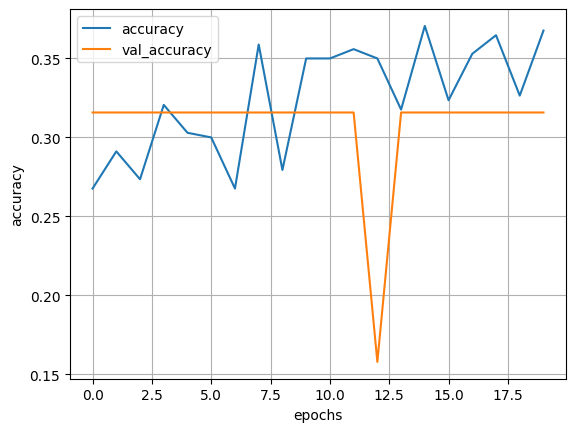

In [ ]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history_TL.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

Loading the best weights

In [ ]:
model3_TL.load_weights("model3_TL.h5")
testLoss_model21 , testAccuracy_model21 = model3_TL.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_model21, testAccuracy_model21))

4/4 [==============================] - 5s 1s/step - loss: 1.4335 - accuracy: 0.3701
Test-loss: 1.433490, Test-accuracy: 0.370079


In [ ]:
cProba = model3_TL.predict(X_test_std[:1])
print(cProba)

1/1 [==============================] - 5s 5s/step
[[0.27874765 0.13948631 0.28940055 0.29236546]]


In [ ]:
y_test[:1]

array([3])

In [ ]:
cLabel = np.argmax(cProba, axis=-1)
print(cLabel)

[3]


In [ ]:
model3_TL.save("/content/drive/MyDrive/Deep_Learning_Final_Project/model3_TL.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model2_TL = keras.models.load_model('/content/drive/MyDrive/Deep_Learning_Final_Project/model2_TL.h5')

4/4 [==============================] - 26s 4s/step
Classification report for classifier <keras.src.engine.functional.Functional object at 0x7828af202020>:
              precision    recall  f1-score   support

           0       0.58      0.58      0.58        26
           1       0.60      0.18      0.28        33
           2       0.60      0.86      0.71        21
           3       0.69      0.89      0.78        47

    accuracy                           0.64       127
   macro avg       0.62      0.63      0.58       127
weighted avg       0.63      0.64      0.60       127




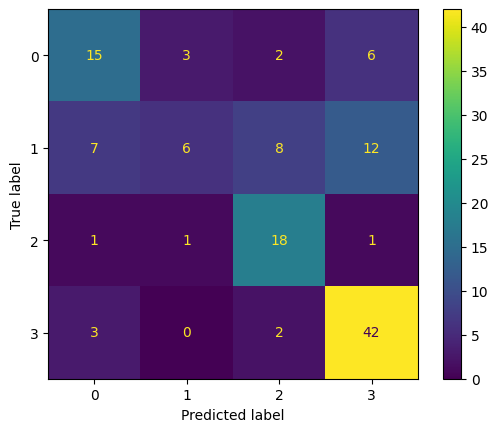

In [ ]:
from sklearn import metrics
predicted = model2_TL.predict(X_test_std)
predicted_class = np.argmax(predicted, axis=1)

print("Classification report for classifier %s:\n%s\n"
% (model2_TL, metrics.classification_report(y_test, predicted_class)))
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confMatrix = confusion_matrix(y_true = y_test, y_pred = predicted_class)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)
disp.plot()
plt.show()